In [1]:
x = list(range(10))
y = [1, 1, 2, 4, 5, 7, 8, 9 ,9, 10]
print(len(y))
print(len(x))

10
10


In [2]:
import matplotlib.pyplot as plt

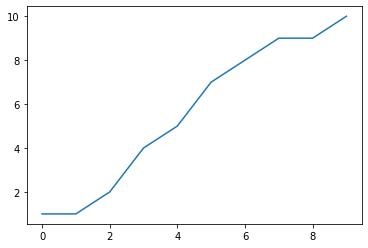

In [3]:
plt.plot(x,y)

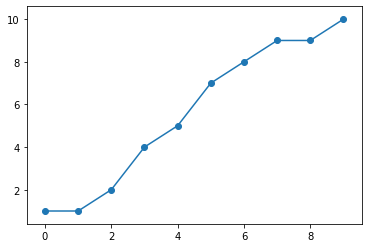

In [4]:
plt.plot(x,y)
plt.scatter(x,y)

#### cost 함수 정의

In [17]:
class H():
    
    def __init__(self, w):
        self.w = w
#class 안의 method는 항상 self를 붙여주어야 한다.
#여기서 self는 h를 가리킴
    
    def forward(self, x):
        return self.w * x
 #pytorch에서는 forward로 값을 전달해준다
    
def cost(h, x, y):
    error = 0
    for i in range(len(x)):
        error += (h.forward(x[i]) - y[i])**2
    
    error = error / len(x)
    return error
    
h = H(4)
cost(h, x, y)


222.2

#### for 문 이용하여 다양한 h 값에 대하여 계산

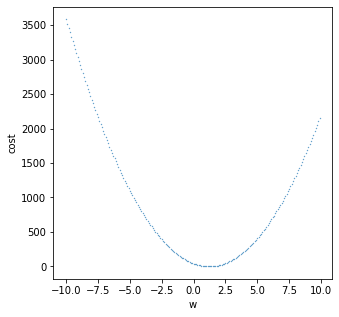

In [28]:
list_w = []
list_c = []
for i in range(-100,100):
    w = i*0.1
    h = H(w)
    c = cost(h, x, y)
    list_w.append(w)
    list_c.append(c)

plt.figure(figsize = (5,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)

#### 수치해석적으로 gradient 구하기

In [44]:
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, x, y)
    eps = 0.001
    h = H(w+eps)
    #h eps만큼 이동
    cost2 = cost(h, x, y)
    #새로운 cost2
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost + cost2)*0.5

w = 4
lr = 0.01

for i in range(10):
    grad, mean_cost = cal_grad(w, cost)
    w -= lr * grad
    print(w, mean_cost)

TypeError: unsupported operand type(s) for +: 'function' and 'float'